### Details:
* Author: Gayathri Nadar (Cellular Imaging Facility, FMP Berlin)
* Date: 2022-10
* For: Group 1 project work
* Sections of notebook adapted from https://github.com/haesleinhuepf/apoc/blob/main/demo/demo_object_segmenter.ipynb and https://github.com/haesleinhuepf/apoc/blob/main/demo/train_on_folders.ipynb 

### What does it do?
* Read images in folder, read model and apply to images in the folder in a loop.
* **Note: images should be 2D, single channel and similar to images trained on.**

### Prediction postprocessing 
The output labels are postprocessed to remove unwanted regions - **Courtesy: Daniel Waiger Daniel.Waiger@mail.huji.ac.il**

### Output
* Label map output from classifier prediction.


In [1]:
import napari 
import skimage 
from skimage import data
from skimage.io import imread, imshow, imsave
import pyclesperanto_prototype as cle
import numpy as np
import apoc
import os 
from os.path import isfile, join
import random


modelfile = "./data/TIFF/Results/Model.cl"
datadir = "./data/TIFF/cl80/"
savedir = os.path.join(os.path.dirname(os.path.dirname(datadir)), "Results")
if not os.path.exists(savedir):
	os.makedirs(savedir)
    
    
def postprocessLabelImage(rawimage, label_segmentationoutput, sizemin=5000, sizemax=50000):
    dilated = cle.dilate_labels(label_segmentationoutput, None, 2.0)
    sizefiltered = cle.exclude_labels_outside_size_range(dilated, None, sizemin, sizemax)
    merged = cle.merge_labels_with_border_intensity_within_range(image, sizefiltered, None, 2.0, 100.0)
    final = cle.relabel_sequential(merged, None, 4.0)
   
    return final 

def addNapariLabelLayer(viewer, labelimage, name=""):
    viewer.add_labels(labelimage, name=name)
    
def applyObjectSegmentator(clfile, image):
    clf = apoc.ObjectSegmenter(opencl_filename=clfile)
    outputlabels = clf.predict(image=image)
    
    return outputlabels

In [2]:
files = [f for f in os.listdir(datadir) if isfile(os.path.join(datadir, f)) and f.startswith("C4") and f.endswith(".tif")]
files

['C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap1.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap2.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap3.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap4.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap5.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap6.tif',
 'C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap7.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap1.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap2.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap3.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap4.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap5.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap6.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap7.tif',
 'C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap8.tif',
 'C4_cl80_

### Pick and display a random image

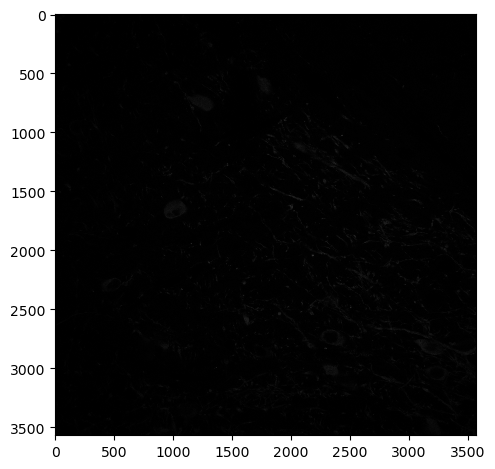

In [3]:
n = random.randint(0, len(files) - 1)
image = imread(join(datadir, files[n]))
imshow(image, cmap= 'gray')

### Open model 

In [4]:
clf = apoc.ObjectSegmenter(opencl_filename=modelfile)

### Optional - view an output 

In [5]:
output_test = clf.predict(image=image)
output_test_final = postprocessLabelImage(image, output_test)

# show
cle.imshow(output_test_final, labels=True)

LogicError: create_buffer failed: INVALID_BUFFER_SIZE

### Apply model to all images and save

In [6]:
for ff in files:
    im = imread(join(datadir, ff))
    pred = clf.predict(image=im)
    pred_final = postprocessLabelImage(im, pred)
    
    imsave(join(savedir, "output_" + ff), pred_final)

C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-packages\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  warnings.warn("generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.\n" +
C:\Users\nadar.gayathri\AppData\Local\Temp\ipykernel_8172\2139004775.py:12: UserWarning: ./data/TIFF\Results\output_C4_cl80_s1_lame1_line1_slice2_th_psyn_lamp1_lc3_x40_snap1.tif is a low contrast image
  imsave(join(savedir, "output_" + ff), pred_final)
C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-packages\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  w

C:\Users\nadar.gayathri\AppData\Local\Temp\ipykernel_8172\2139004775.py:12: UserWarning: ./data/TIFF\Results\output_C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap6.tif is a low contrast image
  imsave(join(savedir, "output_" + ff), pred_final)
C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-packages\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  warnings.warn("generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.\n" +
C:\Users\nadar.gayathri\AppData\Local\Temp\ipykernel_8172\2139004775.py:12: UserWarning: ./data/TIFF\Results\output_C4_cl80_s1_lame1_line1_slice3_th_psyn_lamp1_lc3_x40_snap7.tif is a low contrast image
  imsave(join(savedir, "output_" + ff), pred_final)
C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-pac

C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-packages\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  warnings.warn("generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.\n" +
C:\Users\nadar.gayathri\AppData\Local\Temp\ipykernel_8172\2139004775.py:12: UserWarning: ./data/TIFF\Results\output_C4_cl80_s1_lame1_line1_slice5_th_psyn_lamp1_lc3_x40_snap5.tif is a low contrast image
  imsave(join(savedir, "output_" + ff), pred_final)
C:\ProgramData\Anaconda3\envs\ilastik-napari-devbio\lib\site-packages\pyclesperanto_prototype\_tier3\_generate_touch_mean_intensity_matrix.py:30: UserWarning: generate_touch_mean_intensity_matrix is supposed to work with images of integer type only.
Loss of information is possible when passing non-integer images.
  w